# Titanic Dataset Basic Analysis: Descriptive Statistics 

In [4]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from scipy.stats import pearsonr

In [5]:
titanic = pd.read_csv('titanic.csv') # Read the dataset

In [6]:
titanic.head() # Returns the first rows of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic.info()  # Returns info of dataset, for example we can see that 'cabin' and 'Age' have some null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic.describe() # with describe we can have some descriptive statistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Descriptive statistics (focusing on Age)

In [10]:
titanic['Age'] # Accessing the values of the Age column

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### Mean

Given a variable $A=\{a_1,a_2,\ldots,a_n\}$ $\mu=(a_1+a_2+\ldots+a_n)/n$

In [11]:
titanic['Age'].mean() # It is a mathematical value, not taken directly from the series

29.69911764705882

### Median 

Given a variable $A=\{a_1,a_2,\ldots,a_n\}$ and assuming an order $a_i<a_{i+1}$ $M = a_{n/2}$

In [12]:
titanic['Age'].median() # Value that cuts the population in two. Returns a real value taken directly from the empirical distribution

28.0

### Mode

In [13]:
titanic['Age'].mode() # Most frequent value of the series

0    24.0
Name: Age, dtype: float64

### Variance and Standard Deviation

Given a variable $A=\{a_1,a_2,\ldots,a_n\}$ 

Variance  $v = \frac{\sum_{i=1}^{n}{(a_i-\mu)^2}}{n}$

Standard Deviation = $\sqrt{v}$


In [ ]:
# Variance = How much the given value deviates from the mean
# Standard Deviation = The square root of the variance

### Minimum and Maximum
Represent the range of the variable

In [22]:
titanic['Age'].max()

80.0

In [23]:
titanic['Age'].min()

0.42

### Percentile
Given a variable $A=\{a_1,a_2,\ldots,a_n\}$ and assuming and order $a_i<a_{i+1}$
The n-th percentile is the $a_i$ value that separates the n-th percentage of the population from the rest of the data

## Some reasoning about variables

In [14]:
titanic['Survived'].unique() # What kind of variable we have? 
# With unique we can see the possible values

array([0, 1], dtype=int64)

In [31]:
titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [26]:
titanic['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [27]:
titanic['Survived'].value_counts() # value_counts()
# In addition to the possible values of the variable, it gives us a count of how many of those values there are for that value

Survived
0    549
1    342
Name: count, dtype: int64

In [29]:
titanic['Pclass'].value_counts() # People in third class were the majority

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [30]:
titanic['Age'].value_counts() # Possible values of age and how much people for that age

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

## Introduction to visualization

<Axes: >

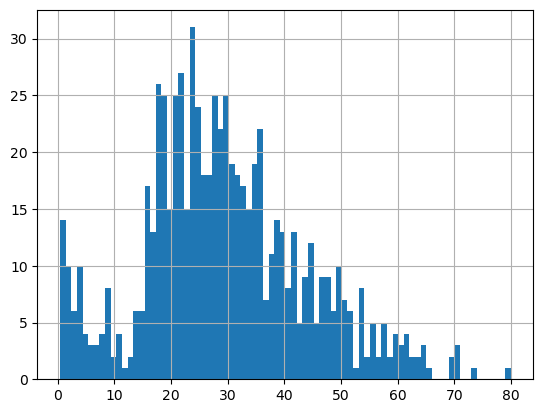

In [32]:
# Histogram of values. We pass the intervals into which to divide the population, the bins (i.e. how many intervals)
titanic['Age'].hist(bins = 80)

<Axes: >

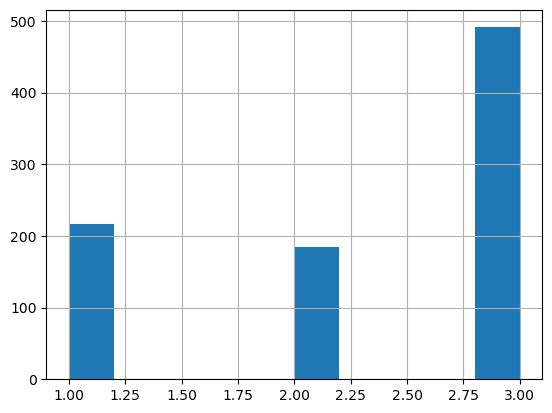

In [34]:
# When there are few values there is no need to specify bins
titanic['Pclass'].hist()

### Compared to the class, how many died and/or survived on the Titanic?

In [15]:
# There is a way to display data based on combinations of variables
dead_for_class = titanic.groupby(['Pclass', 'Survived'])

In [16]:
dead_for_class.count()['PassengerId']

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

<Axes: >

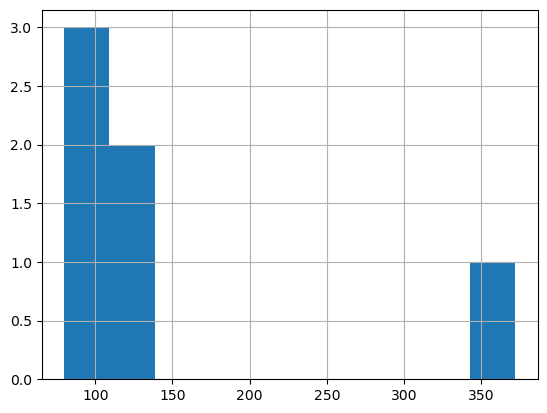

In [17]:
# How to view? The histogram in this case is incomprehensible
dead_for_class.count()['PassengerId'].hist()

(array([ 80.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 136.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

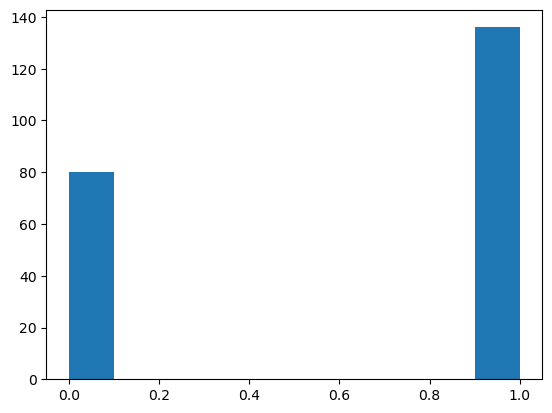

In [18]:
# Using matplotlib, I make a separate histogram for each of the values
plt.hist(titanic.loc[titanic['Pclass'] == 1, 'Survived'])
# What have I done:
# titanic.loc[titanic['Pclass'] == 1, 'Survived']
# I select all passengers who have class 1 who survived and insert it into a histogram with matplotlib

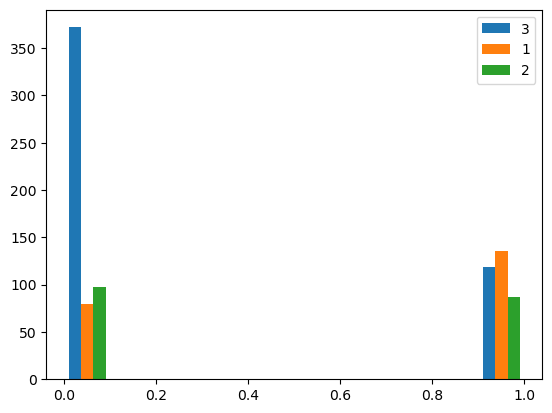

In [50]:
# How to put it all together? Instead of entering the class with a number in the formula every time? With a cycle
plt.hist([titanic.loc[titanic['Pclass'] == x, 'Survived'] for x in pc], label = pc)
plt.legend()
# label = pc is for class-based labeling
# plt.legend prints a legend

## Alternative ways to answer the previous question

In [52]:
#Without groupby and without filtering by passengerid, with the pandas crosstab method:
pd.crosstab(titanic['Pclass'], titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [19]:
# It also returns a dataframe, so you can do operations on it
Surv_class = pd.crosstab(titanic['Pclass'], titanic['Survived'])
# Sum with respect to axis 1 with sum, i.e. sum over columns (Would be the total of people in each class)
Surv_class.sum(1)

Pclass
1    216
2    184
3    491
dtype: int64

In [21]:
# Percentage of deceased and deceased compared to the class
Surv_class_pct = Surv_class.div(Surv_class.sum(1).astype(float), axis = 0)
# div is used to divide. The axis is zero because it divides across the lines
Surv_class_pct

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


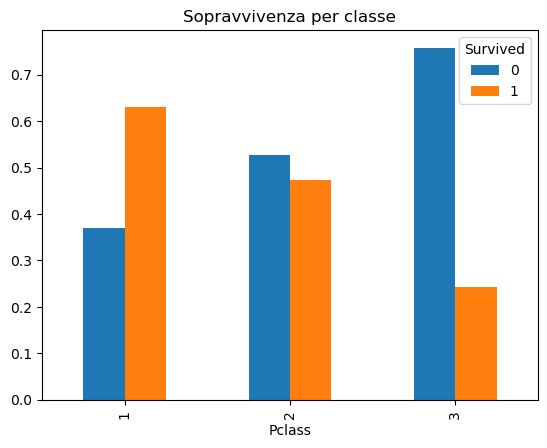

In [60]:
Surv_class_pct.plot(kind = 'bar', title ='Sopravvivenza per classe')
plt.show()

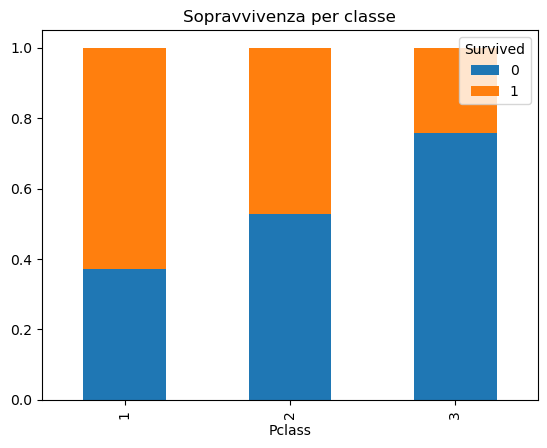

In [61]:
Surv_class_pct.plot(kind = 'bar', title ='Sopravvivenza per classe', stacked = True)
plt.show()

### Rename the axes

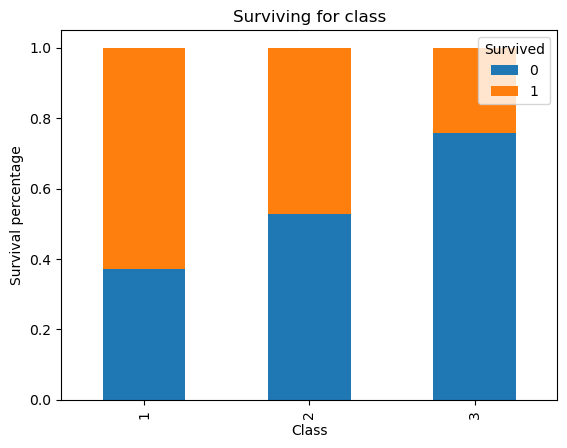

In [22]:
Surv_class_pct.plot(kind = 'bar', title ='Surviving for class', stacked = True)
plt.xlabel('Class')
plt.ylabel('Survival percentage')
plt.show()

## Covariance and Correlation

Given a variable $A=\{a_1,a_2,\ldots,a_n\}$ with mean $\mu_A$

$v_A = \frac{\sum_{i=1}^{n}{(a_i-\mu)^2}}{n}$

Given a secon variabe $B=\{b_1,b_2,\ldots,b_n\}$ with mean $\mu_B$

$v_B = \frac{\sum_{i=1}^{n}{(b_i-\mu)^2}}{n}$

### Covariance

$cov(A,B) = \frac{1}{n}\sum_{i=1}^{n}(a_i - \mu_A)(b_i-\mu_B)$

### Correlation

$corr(A,B) = cov(A,B)/std(A)std(B)$

(Coefficient of Pearson)

In [10]:
# Pearson correlation (varies from -1 to 1) between survived and age
titanic['Survived'].corr(titanic['Age'])

-0.07722109457217764

### How do you interpret the correlation?
If the correlation is 1 it means that the two variables are perfectly correlated (as one var increases the other also increases proportionally)

If the correlation is 0 it means there is no correlation (they vary independently)

If the correlation is -1 it means that there is a perfect negative correlation (inverse correlation, if one var increases the other decreases proportionally)

In [ ]:
# In our case, there is no correlation between survival and age

In [12]:
# Covariance
titanic['Survived'].cov(titanic['Age'])

-0.5512960976817095

In [14]:
# Other methods
titanic[['Survived','Age']].cov()

,Survived,Age
Survived,0.236772,-0.551296
Age,-0.551296,211.019125


In [15]:
titanic[['Survived','Age']].corr()

,Survived,Age
Survived,1.000000,-0.077221
Age,-0.077221,1.000000


## Translate categorical variables with Pandas (One Hot Encoding)

### Finding the correlation between survivors and sex

In [17]:
titanic['Sex'].unique() # For example, sex has two types of values: male, female

array(['male', 'female'], dtype=object)

In [16]:
pd.get_dummies(titanic['Sex']) # One Hot Encoding: Allows you to obtain values instead of a categorical variable

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [19]:
# Now I can correlate variables
# I use corrwith instead of corr because the two variables are not the same size
pd.get_dummies(titanic['Sex']).corrwith(titanic['Survived'])

female    0.543351
male     -0.543351
dtype: float64

## Let's try to put the variables from encoding back into the dataset

In [27]:
titanic[['female', 'male']] = pd.get_dummies(titanic['Sex']) #I assign the values given by get_dummies to female and male

In [28]:
interest_columns = ['male','female','Age','Survived']

In [29]:
correlation_matrix = titanic[interest_columns].corr() # Correlation matrix for all columns

## Let's visualize the correlation

<Figure size 1900x1500 with 0 Axes>

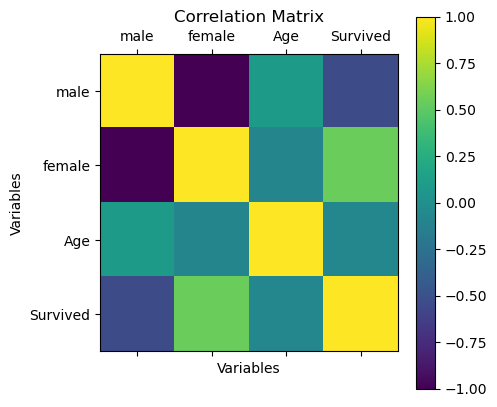

In [30]:
plt.figure(figsize=(19,15))
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(range(len(interest_columns)), labels = interest_columns) # From zero up to and including 4, I give the columns of interest as labels
plt.yticks(range(len(interest_columns)), labels = interest_columns) # Same for y
cb = plt.colorbar() # Added a colorbar linked to the correlation value
plt.show()

In [39]:
# Correlation between age and ticket price
titanic['Age'].corr(titanic['Fare'])
# Very weak correlation

0.09606669176903887

Text(0, 0.5, 'Fare')

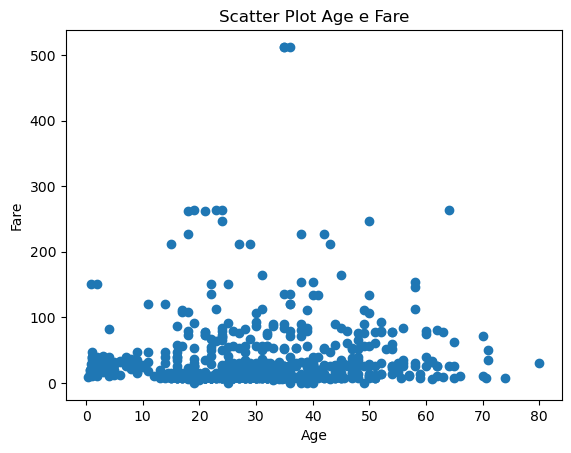

In [46]:
# Scatter Plot
plt.scatter(titanic['Age'], titanic['Fare'])
plt.title('Scatter Plot Age e Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
# Scatter is very important for displaying correlations between values where there is a wide value range, 
# typically between numeric values
# Note that there is no correlation

## Edit data

In [31]:
# Select only people under the age of 18
minor_age_condition = titanic['Age']<18

In [32]:
boys = titanic[minor_age_condition]

<Axes: >

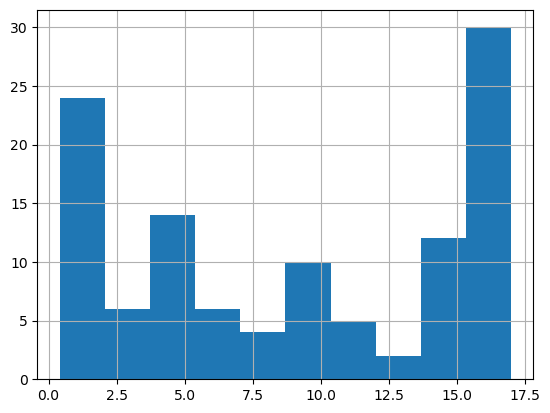

In [33]:
boys['Age'].hist()

<Axes: >

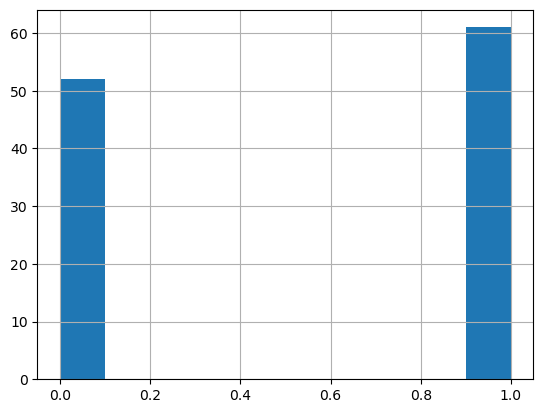

In [54]:
# Survival
boys['Survived'].hist()

In [34]:
Survival = boys['Survived'] == 1
Death = boys['Survived'] == 0

In [35]:
survived_boys = boys[Survival]
dead_boys = boys[Death]

<Axes: >

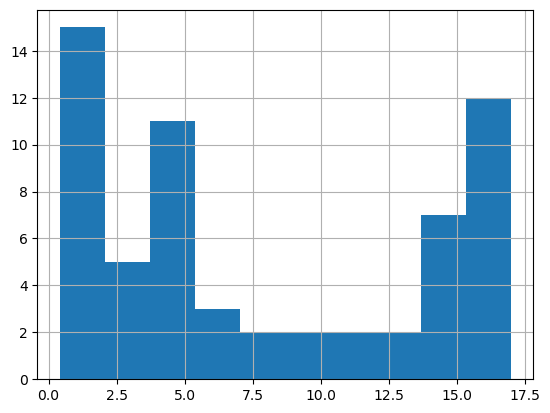

In [36]:
survived_boys['Age'].hist()

<Axes: >

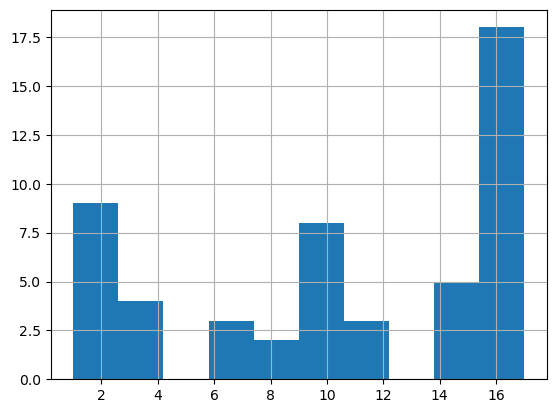

In [37]:
dead_boys['Age'].hist()

In [38]:
# Otherway
titanic[(titanic['Age']<18) & (titanic['Survived'] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,True,False
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,True,False
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.00,0,0,330923,8.0292,NaN,Q,True,False
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.00,1,0,2651,11.2417,NaN,C,True,False
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.00,1,0,2659,14.4542,NaN,C,True,False
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,False,True
853,854,1,1,"Lines, Miss. Mary Conover",female,16.00,0,1,PC 17592,39.4000,D28,S,True,False
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.00,1,1,347742,11.1333,NaN,S,False,True
